In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
def sift_once(signal, t):
    # 최대값과 최소값을 찾기
    max_peaks = [j for j in range(1, len(signal)-1) if signal[j-1] < signal[j] > signal[j+1]]
    min_peaks = [j for j in range(1, len(signal)-1) if signal[j-1] > signal[j] < signal[j+1]]

    # 최대값과 최소값의 위치에 대해 cubic spline 보간
    if len(max_peaks) > 1 and len(min_peaks) > 1:
        upper_env = CubicSpline(t[max_peaks], signal[max_peaks])(t)
        lower_env = CubicSpline(t[min_peaks], signal[min_peaks])(t)
        
        # 평균 곡선 계산
        mean_env = (upper_env + lower_env) / 2
        
        # IMF 갱신
        imf = signal - mean_env
        
        return imf, upper_env, lower_env, mean_env
    else:
        return signal, np.zeros_like(signal), np.zeros_like(signal), np.zeros_like(signal)

In [34]:
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams.update({
    "text.usetex": True,
#    "font.family": "Helvetica"
})

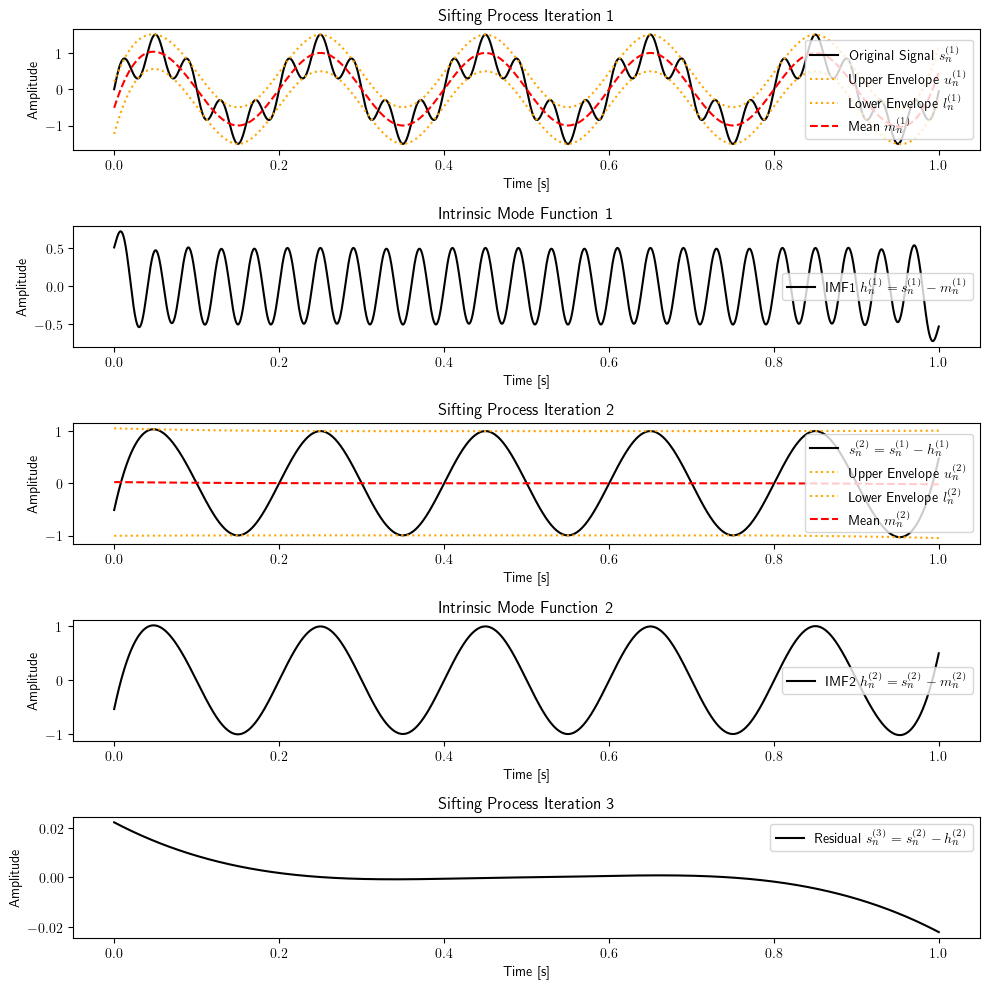

In [53]:
# 초기 신호 설정
# 샘플링 주파수 및 시간 축 설정
fs = 1000
t = np.linspace(0, 1, 2 * fs, endpoint=False)

# 두 개의 주파수를 가진 신호 생성
signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 25 * t)
residual = signal
imfs = []
imf, upper_env, lower_env, mean_env = sift_once(residual, t)
imfs.append(imf)

plt.figure(figsize=(10, 10))

plt.subplot(5, 1, 1)
plt.plot(t, residual, 'k', label=r'Original Signal $s^{(1)}_n$')
plt.plot(t, upper_env, 'orange', label=r'Upper Envelope $u^{(1)}_n$', linestyle='dotted')
plt.plot(t, lower_env, 'orange', label=r'Lower Envelope $l^{(1)}_n$', linestyle='dotted')
plt.plot(t, mean_env, 'r', label=r'Mean $m^{(1)}_n$', linestyle='dashed')
plt.title(f"Sifting Process Iteration 1")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(t, imf, 'k', label='IMF1 $h^{(1)}_n=s^{(1)}_n-m^{(1)}_n$')
plt.title(f"Intrinsic Mode Function 1")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

# 남은 신호 업데이트
residual -= imf
imf, upper_env, lower_env, mean_env = sift_once(residual, t)
imfs.append(imf)

plt.subplot(5, 1, 3)
plt.plot(t, residual, 'k', label=r'$s^{(2)}_n=s^{(1)}_n-h^{(1)}_n$')
plt.plot(t, upper_env, 'orange', label='Upper Envelope $u^{(2)}_n$', linestyle='dotted')
plt.plot(t, lower_env, 'orange', label='Lower Envelope $l^{(2)}_n$', linestyle='dotted')
plt.plot(t, mean_env, 'r', label='Mean $m^{(2)}_n$', linestyle='dashed')
plt.title(r"Sifting Process Iteration 2")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, imf, 'k', label='IMF2 $h^{(2)}_n=s^{(2)}_n-m^{(2)}_n$')
plt.title(f"Intrinsic Mode Function 2")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

# 남은 신호 업데이트
residual -= imf
imf, upper_env, lower_env, mean_env = sift_once(residual, t)
imfs.append(imf)

plt.subplot(5, 1, 5)
plt.plot(t, residual, 'k', label='Residual $s^{(3)}_n=s^{(2)}_n-h^{(2)}_n$')
plt.title(f"Sifting Process Iteration 3")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
fig = plt.gcf()
plt.show()